#Identify Fraud from Enron Email - Intro to ML Project
##Woody Yao

##Introduction 
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. The scandal has brought great impacts on accounting worldwide, which I majored in university, making me more interested in digging into the dataset. In this project, I would play a detective, and put my new skills into it by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. 
Please note that the python version I dealt with was 3.5, which was different from the version the starter codes applied in many ways. As a result, I would modify the starter codes to keep them out of malfunctioning.

### Step 1: Load the dataset and get understanding about the features

In [1]:
import pickle
from collections import defaultdict
import numpy as np

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

print ("Data type: ", type(data_dict))
print ("Data frame and data points in total: ", list(data_dict.items())[0:1], len(data_dict.items()))
print ("Total features number: ", len(list(data_dict.items())[0][1]))

def counting_machine(dictionary):
    '''Put the original data_dict into this function
        it would count how many nan and false values for each feature.'''
    counter_dict = defaultdict(int)
    for key, value_dict in dictionary.items():
        for feature_key, feature_value in value_dict.items():
            if feature_value == 'NaN' or feature_value == False:
                counter_dict[feature_key] +=1
    return counter_dict

print(counting_machine(data_dict))

Data type:  <class 'dict'>
Data frame and data points in total:  [('THORN TERENCE H', {'shared_receipt_with_poi': 73, 'restricted_stock_deferred': 'NaN', 'to_messages': 266, 'other': 426629, 'bonus': 'NaN', 'from_poi_to_this_person': 0, 'expenses': 46145, 'from_this_person_to_poi': 0, 'salary': 222093, 'total_stock_value': 4817796, 'exercised_stock_options': 4452476, 'restricted_stock': 365320, 'deferral_payments': 16586, 'total_payments': 911453, 'director_fees': 'NaN', 'loan_advances': 'NaN', 'long_term_incentive': 200000, 'email_address': 'terence.thorn@enron.com', 'from_messages': 41, 'poi': False, 'deferred_income': 'NaN'})] 146
Total features number:  21
defaultdict(<class 'int'>, {'exercised_stock_options': 44, 'restricted_stock_deferred': 128, 'from_poi_to_this_person': 72, 'other': 53, 'bonus': 64, 'from_this_person_to_poi': 80, 'expenses': 51, 'to_messages': 60, 'salary': 51, 'total_stock_value': 20, 'shared_receipt_with_poi': 60, 'restricted_stock': 36, 'deferral_payments': 

##Data Structure
After loading the dataset and printing out the first data point, we can see the data structure is a dictionary with 146 data point in total. The dictionary key was the person's name, and the value was another dictionary with 21 key-value pairs in total, which contained the names of all the features and their values for that person. The features in the data fell into three major types, namely financial features, email features and POI labels. 
See the first data point with dict.items method for example:

[('PRENTICE JAMES', {'to_messages': 'NaN', 'director_fees': 'NaN', 'restricted_stock': 208809, 'bonus': 'NaN', 'deferred_income': 'NaN', 'email_address': 'james.prentice@enron.com', 'long_term_incentive': 'NaN', 'other': 'NaN', 'loan_advances': 'NaN', 'poi': False, 'salary': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferral_payments': 564348, 'from_this_person_to_poi': 'NaN', 'total_stock_value': 1095040, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 886231, 'from_messages': 'NaN', 'total_payments': 564348, 'shared_receipt_with_poi': 'NaN', 'expenses': 'NaN'})]

###financial features: 
['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

###email features: 
['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

###POI label: 
[‘poi’] (boolean, represented as integer)

The interesting and hard part of the dataset was that the distribution of the non-POI's to POI's was very skewed, given that from the 146 there were only 18 people or data points labeled as POI's. I was interested in labeling every person in the dataset into either a POI or a non-POI (POI stands for Person Of Interest).


###Features without value
By digging the data structure more deeply, I found that not only POI distribution was very skewed, but there were a lot of none values expressed by string 'NaN'. Find the dictionary addressing how many NaN or false in each feature below:
{'other': 53, 'deferred_income': 97, 'bonus': 64, 'restricted_stock': 36, 'deferral_payments': 107, 'director_fees': 129, 'email_address': 35, 'to_messages': 60, 'restricted_stock_deferred': 128, 'from_messages': 60, 'salary': 51, 'long_term_incentive': 80, 'total_payments': 21, 'poi': 128, 'from_this_person_to_poi': 80, 'shared_receipt_with_poi': 60, 'total_stock_value': 20, 'exercised_stock_options': 44, 'expenses': 51, 'loan_advances': 142, 'from_poi_to_this_person': 72}

From the dictionary I found that even the salary, total payments, and messages sent and received got many none values, which might make the POI prediction more difficult.

In [2]:
def ppl_counting(dictionary, value_appointed):
    '''Put the original data_dict into this function and appoint what you want to count 
        ('NaN' or whatever you like)
        it would count how many appointed values for each data point (employee).'''
    counter_dict = defaultdict(int)
    for key, value_dict in dictionary.items():
        counter = 0
        for value in value_dict.values():
            if value == value_appointed:
                counter += 1
            else: continue
        # The codes below is set for checking how poi and NaN value counts distribute
        #if value_dict['poi'] == 0:
        #    counter_dict[key] = counter
        #else:
        #    counter_dict[key] = -counter
        counter_dict[key] = counter
    return counter_dict

NaN_count = ppl_counting(data_dict, 'NaN')
print(sorted(NaN_count.items(), key = lambda counting: counting[1],
                      reverse = True))

[('LOCKHART EUGENE E', 20), ('WHALEY DAVID A', 18), ('THE TRAVEL AGENCY IN THE PARK', 18), ('GRAMM WENDY L', 18), ('WROBEL BRUCE', 18), ('SCRIMSHAW MATTHEW', 17), ('GILLIS JOHN', 17), ('SAVAGE FRANK', 17), ('WODRASKA JOHN', 17), ('WAKEHAM JOHN', 17), ('CLINE KENNETH W', 17), ('PEREIRA PAULO V. FERRAZ', 16), ('CHRISTODOULOU DIOMEDES', 16), ('MENDELSOHN JOHN', 16), ('MEYER JEROME J', 16), ('YEAP SOON', 16), ('LOWRY CHARLES P', 16), ('URQUHART JOHN A', 16), ('WINOKUR JR. HERBERT S', 16), ('CHAN RONNIE', 16), ('GATHMANN WILLIAM D', 16), ('BLAKE JR. NORMAN P', 16), ('FUGH JOHN L', 16), ('NOLES JAMES L', 15), ('BADUM JAMES P', 15), ('LEMAISTRE CHARLES', 15), ('GRAY RODNEY', 15), ('WALTERS GARETH W', 15), ('DUNCAN JOHN H', 15), ('BELFER ROBERT', 14), ('PRENTICE JAMES', 14), ('JAEDICKE ROBERT', 13), ('BERBERIAN DAVID', 13), ('HIRKO JOSEPH', 13), ('BAZELIDES PHILIP J', 13), ('SULLIVAN-SHAKLOVITZ COLLEEN', 12), ('HAYSLETT RODERICK J', 12), ('BROWN MICHAEL', 12), ('MORDAUNT KRISTINA M', 12), ('ST

###None values counting for each person
After knowing that there were a lot of none values in each feature, I created another dictionary to count the amount of missed values for each person. Here's the persons and their missed values in total (only including data points with count higher than 15):

[('LOCKHART EUGENE E', 20), ('WHALEY DAVID A', 18), ('WROBEL BRUCE', 18), ('GRAMM WENDY L', 18), ('THE TRAVEL AGENCY IN THE PARK', 18), ('CLINE KENNETH W', 17), ('SAVAGE FRANK', 17), ('WAKEHAM JOHN', 17), ('WODRASKA JOHN', 17), ('GILLIS JOHN', 17), ('SCRIMSHAW MATTHEW', 17), ('CHAN RONNIE', 16), ('YEAP SOON', 16), ('CHRISTODOULOU DIOMEDES', 16), ('WINOKUR JR. HERBERT S', 16), ('MENDELSOHN JOHN', 16), ('BLAKE JR. NORMAN P', 16), ('URQUHART JOHN A', 16), ('PEREIRA PAULO V. FERRAZ', 16), ('LOWRY CHARLES P', 16), ('MEYER JEROME J', 16), ('GATHMANN WILLIAM D', 16), ('FUGH JOHN L', 16)]

According to the fact I found out earlier, the total of key-value pairs in each datum is 21, and POI identity must be identified with boolean (True or False). As the person "LOCKHART EUGENE E" have 20 NaN values, I would say this datum was unable to help us predict or figure out who might be the POI because there were no effective features. Additionally, although the persons with NaN value count higher than 13 were all non-POI, we might not be able to assure and predict that every person with high NaN value count were all non-POI, and lacking of information might make the prediction easy to be biased.

Before transforming the none values into numbers to easily analyze and run machine learning algorithms, I also check whether there were any zeros in the original dataset and I noticed that some data points had zeros besides the boolean value (False, non-POI). I would like to take this into consideration and turn the NaN values into -10. as a penalty value when doing the data transformation. Note that most value of feature "deferred_income" were negative, so I set the penalty to be positive.

### Step 2: Data pre-process and analysis

In [3]:
def extract_feature_names(dict):
    "Define a function to extract all features in the dict of dict and easier to plot"
    dict_values = list(dict.values())[0]
    dict_values_features = list(dict_values.keys())
    dict_values_features.remove('poi')
    dict_values_features.remove('email_address')
    dict_values_features = sorted(dict_values_features)
    #print(dict_values_features)
    return dict_values_features

In [4]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

#preprocess on the NaN value in the dictionary!!!
def remove_nan(dict, penalty, remove_outlier = False):
    '''looking through the dataset and 
    turn NaN into -1
    also turn all integers into floats
    and remove email_address'''
    for point, sub_dict in dict.items():
        for key, value in sub_dict.items():
            if key == 'email_address': continue
            if value == 'NaN' or np.isnan(value):
                if key == 'deferred_income':
                    sub_dict[key] = - float(penalty)
                else:
                    sub_dict[key] = float(penalty)
            else:
                sub_dict[key] = float( value )
    if remove_outlier:
        dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
        dict.pop('TOTAL', 0)
        dict.pop('LOCKHART EUGENE E', 0)
    return dict
my_dataset = remove_nan(my_dataset, -10, remove_outlier = True)

def reset_feature_list(my_dataset):
    ### features_list is a list of strings, each of which is a feature name.
    ### The first feature must be "poi".
    features_list = ['poi']
    features_list.extend(extract_feature_names(my_dataset))
    return features_list
    #Total 20 features including poi as the first feature

features_list = reset_feature_list(my_dataset)
#print(list(my_dataset.items())[1])
print(features_list)

['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


After removing the "NaN" values, I created a features list to store all features in the dataset. This would help a lot when I needed to put features into any algorithms to analyze.

###Outliers
In addition, by checking the pdf file of financial benefits, I noticed that there were 2 clear outliers in the data, "TOTAL" and "THE TRAVEL AGENCY IN THE PARK". The first one seemed to be the sum total of all the other data points, while the second outlier was quite bizarre. Both these outliers and the datum with all NaN values, "LOCKHART EUGENE E", were removed from the dataset for all the analysis by applying __dict.pop(key, 0)__. 

In [5]:
def is_nan(x):
    return (x is np.nan or x != x)
#create a dict that key is the feature name and values are a list of floats

def dict_with_feature(dataset, sorting=False):
    '''
    define a dict with feature_key to better understand the distribution
    key = feature name (salary, bonus, etc.)
    value = list of values of each person
    '''
    dict_with_features = defaultdict(list)
    for point, sub_dict in dataset.items():
        for key, value in sub_dict.items():
            #email address is a string, so pass to next when facing it
            if key == 'email_address': continue
            #create list to save values
            if value == 'NaN':
                if key == 'deferred_income':
                    value = 10.
                else: 
                    value = -10.
                dict_with_features[key].append( float(value) )
            else:
                dict_with_features[key].append( float(value) )
    #sorting values
    if sorting:
        for key, value in dict_with_features.items():
            dict_with_features[key] = sorted(value, key = lambda x : float('-inf') if is_nan(x) else x)
            #sorting nan reference: 
            #https://stackoverflow.com/questions/4240050/python-sort-function-breaks-in-the-presence-of-nan
    return dict_with_features
    #data points = 146 or 143
    #nan means 0.000000

In [6]:
dict_with_features = dict_with_feature(my_dataset)
from scipy.stats.stats import pearsonr
for key in dict_with_features.keys():
    print ('PearsonR between poi and ', key, " : ", 
           pearsonr(dict_with_features['poi'], dict_with_features[key]))

PearsonR between poi and  exercised_stock_options  :  (0.38685273723309588, 1.8182211820386215e-06)
PearsonR between poi and  restricted_stock_deferred  :  (-0.021548443730261418, 0.79837555950439509)
PearsonR between poi and  from_poi_to_this_person  :  (0.1925980246707418, 0.021192156728044927)
PearsonR between poi and  bonus  :  (0.35848605315772913, 1.1012789919115899e-05)
PearsonR between poi and  other  :  (0.16983000295074535, 0.042580414923631717)
PearsonR between poi and  from_this_person_to_poi  :  (0.13496836430315587, 0.10801392105201223)
PearsonR between poi and  expenses  :  (0.20356124128833136, 0.014749906830119808)
PearsonR between poi and  to_messages  :  (0.10762314208525052, 0.2007528121636562)
PearsonR between poi and  salary  :  (0.33885132032769322, 3.4782882030548758e-05)
PearsonR between poi and  total_stock_value  :  (0.38262353734838978, 2.4043089131893369e-06)
PearsonR between poi and  shared_receipt_with_poi  :  (0.23966097464495092, 0.0039401691216989681)


###Correlation between POI label and others
To better predict who is more likely to be a POI, first of all I computed the correlation between label "poi" and the others, which was listed below:

 | Label 1 |  Label 2 |  Pearson's r |      
 | --- | --- | --- |
 | poi | exercised_stock_options | 0.387 |
 | poi | total_payments | 0.242 |
 | poi | expenses | 0.204 |
 | poi | deferral_payments | -0.040 |
 | poi | to_messages | 0.108 |
 | poi | other | 0.170 |
 | poi | restricted_stock | 0.248 |
 | poi | bonus | 0.358 |
 | poi | total_stock_value | 0.383 |
 | poi | restricted_stock_deferred | -0.022 |
 | poi | loan_advances | 0.220 |
 | poi | shared_receipt_with_poi | 0.240 |
 | poi | from_this_person_to_poi | 0.135 |
 | poi | long_term_incentive | 0.256 |
 | poi | from_messages | -0.034 |
 | poi | from_poi_to_this_person | 0.193 |
 | poi | deferred_income | -0.274 |
 | poi | salary | 0.339 |
 | poi | director_fees | -0.122 |

According to the table, I noticed that there were no any strong relationships between the label "poi" and the others. Since I could not simply classify which labels had more impacts on making a person become a POI, I would like to add more computational labels and apply PCA, which stands for principal components analysis, to pick up the most related labels in the dataset.

### Step 3: Adding new features

##New Features
From the initial dataset, Some new features were added, you can find more details in the table below:


 Feature        |  Description             
 :--- | --- 
 Ratio of messages received from POI       | messages received from POI divided by total received messages
 Ratio of messages sent to POI    | messages sent to POI divided by total sent messages
 Comparison to Average (squared)      | features (financial and non-financial) divided by the average amount of the dataset          
 Comparison to Median (squared) | features (financial and non-financial) divided by the median amount (if not zero) of the dataset

The reason behind the new features of message ratio created was that I expected that POI contacted with each other relatively more often than non-POI and the relationship might be non-linear. To enlarge the variance, I would like to squaring all the new features as well. I also expected that the financial gains of POI are more than the average and median, that was why I compared each feature with the average and median and squared it to get bigger variance.

In [7]:
#Create new features about ratio of each feature to the mean and median of the feature
mean_dict, median_dict = dict(), dict()
#Create a dict to know each mean of feature
for key, value in dict_with_features.items():
    mean_dict[key] = sum(value)/len(value)
    median_dict[key] = sorted(value)[int(len(value)/2)]
print(mean_dict, median_dict)


{'shared_receipt_with_poi': 703.5384615384615, 'restricted_stock_deferred': 73922.5034965035, 'from_poi_to_this_person': 35.04195804195804, 'other': 296803.05594405596, 'bonus': 680720.2727272727, 'to_messages': 1243.2307692307693, 'from_this_person_to_poi': 20.81118881118881, 'salary': 186739.43356643355, 'total_stock_value': 2930132.5034965035, 'exercised_stock_options': 2090315.13986014, 'restricted_stock': 874607.5944055944, 'deferral_payments': 223635.2867132867, 'total_payments': 2272321.188811189, 'director_fees': 10041.23076923077, 'loan_advances': 586878.3216783217, 'expenses': 35619.293706293705, 'long_term_incentive': 339308.7272727273, 'from_messages': 362.13986013986016, 'poi': 0.1258741258741259, 'deferred_income': -195031.05594405593} {'shared_receipt_with_poi': 114.0, 'restricted_stock_deferred': -10.0, 'from_poi_to_this_person': 4.0, 'other': 947.0, 'bonus': 300000.0, 'to_messages': 383.0, 'from_this_person_to_poi': 0.0, 'salary': 210692.0, 'total_stock_value': 976037.

In [8]:
#Create feature list
for point in my_dataset.keys():
    for key in features_list:
        try: mean_dict[key]
        except: continue
        if key != 'poi' and mean_dict[key] != 0:
            my_dataset[point]['%s_mean_ratio' % key] = my_dataset[point][key] / mean_dict[key]
        if key != 'poi' and median_dict[key] != 0:
            my_dataset[point]['%s_median_ratio' % key] = my_dataset[point][key] / median_dict[key]
#check
#print(my_dataset['KISHKILL JOSEPH G'])

In [9]:
#Create new features about square of each feature
#import re
#for point in my_dataset.keys():
#    for key in features_list:
#        if re.findall("_sqr", key) or key == 'poi': continue
#        else:
#            my_dataset[point]['%s_sqr' % key] = \
#                my_dataset[point][key] **2

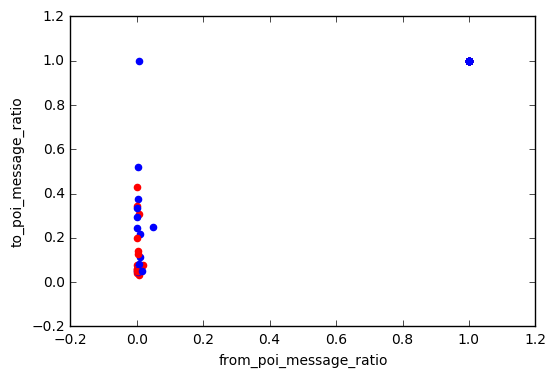

18 71


In [10]:
import matplotlib.pyplot as plt

#Creating new features with messages
for sub_dict in my_dataset.values():
    #Create ratio of messages received from poi to total received messages
    if sub_dict['to_messages'] > 0. or sub_dict['to_messages'] < 0.:
        sub_dict['from_poi_message_ratio'] = \
        (sub_dict['from_poi_to_this_person']/sub_dict['to_messages']) **2
    else:
        sub_dict['from_poi_message_ratio'] = 0.
    #Create ratio of messages sent to poi to total messages sent
    if sub_dict['from_messages'] > 0. or sub_dict['from_messages'] < 0.:
        sub_dict['to_poi_message_ratio'] = \
        (sub_dict['from_this_person_to_poi']/sub_dict['from_messages']) **2
    else:
        sub_dict['to_poi_message_ratio'] = 0.

    
#Define a function to run the plotting and set threshold
def plotting_function(dictionary, value1, value2, threshold1, threshold2, threshold_option = False):
    counter_r, counter_b = 0, 0
    for sub_dict in dictionary.values():
        if sub_dict['poi'] > 0.:
            plt.scatter(sub_dict[value1], sub_dict[value2], color = 'r')
            if threshold_option:
                if float(sub_dict[value1]) <= threshold1: print(value1, 'exception: ', sub_dict[value1])
                elif float(sub_dict[value2]) <= threshold2: print(value2, 'exception: ', sub_dict[value2])
                else: counter_r += 1
        else:
            if threshold_option:
                if float(sub_dict[value1]) <= threshold1: continue
                elif float(sub_dict[value2]) <= threshold2: continue
            plt.scatter(sub_dict[value1], sub_dict[value2], color = 'b')
            counter_b += 1
    plt.xlabel(value1)
    plt.ylabel(value2)
    plt.savefig('poi_messages')
    plt.show()
    print(counter_r, counter_b)
#show some figures
plotting_function(my_dataset, 'from_poi_message_ratio', 'to_poi_message_ratio', 0.0004 , 0.03, True )



![](poi_messages.png)
After computing the ratio of messages received from poi to total received messages and messages sending to poi to total sent messages, I saw that the filter excluded 72 persons before excluded any POI wrongly. It seems like these two features will help me somehow when creating the machine learning classifier. Since I couldn't find any new features to describe data distribution better, next I would like to try some of machine learning algorithms and see which one performed better.

### Step 4: Choosing machine learning algorithm

##Algorithms selection and tuning
For the analysis of the data, a total of 6 classifiers was applied, which included:

####Decision Tree Classifier
####Gaussian Naive Bayes
####Support Vector Classifier (SVC)
####AdaBoost
####Random Forrest Tree Classifier
####K Nearest Neighbor

The object of the algorithm was to classify and find out which people are more likely to be a POI. There were clearly 2 categories I was looking to label the data.

To tune the algorithm, I applied PCA to decompose features and dimentions, and MaxAbsScaler to scale and normalize the features. Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components (or sometimes, principal modes of variation). The number of principal components is less than or equal to the smaller of the number of original variables or the number of observations. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. I did not think the outcome would be the best when I put most features into the algorithms, either only few ones. Also for avoiding overfitting and underfitting, I would like to try PCA components, which meant to group the similar features, between 2 and 10 since there were 58 features in total in the dataset. MaxAbsScaler transforms a dataset of Vector rows, rescaling each feature to range [-1, 1] by dividing through the maximum absolute value in each feature. It does not shift/center the data, and thus does not destroy any sparsity. MaxAbsScaler computes summary statistics on a data set and produces a MaxAbsScalerModel. The model can then transform each feature individually to range [-1, 1].

Also, when conducting machine learning algorithms, validation process must be necessary. A testing set would be needed to validate how the algorithm worked after training and it shall be independent of the training set. In a small or skewed dataset like this one, multiple times of validation process might avoid the algorithm to be biased and improve outcome reliability. To build a validation process, I would like to import the module StratifiedShuffleSplit from sklearn. It would return stratified randomized folds which depends on how many times you want to validate, and the training and testing data allocation would be based on appointed data spliting percentage. Since the Anron dataset was pretty small (only 143 persons) and very skewed POI distribution, I would like to set the cross-validation process to be repeated 1000 time and the tested size to be 10%.

In [11]:
def featureFormat(dictionary, features, sort_keys = True):
    '''definitely not a necessary function
        just for the checking function in the tester.py'''
    return_list = []
    if sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()
    for key in keys:
        tmp_list = []
        for feature in features:
            value = dictionary[key][feature]
            tmp_list.append( float(value) )
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        return_list.append( tmp_list )
    return np.array(return_list)

def targetFeatureSplit( data ):
    '''definitely not a necessary function
    just for the checking function in the tester.py'''
    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [12]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
    
data = featureFormat(my_dataset, reset_feature_list(my_dataset), sort_keys = True)
#features order is organized by names of people 

# one data point is consist of zeros n NaN values
labels, features = targetFeatureSplit( data )

#normalize the features before running!
# http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import MaxAbsScaler
min_max_scaler = MaxAbsScaler()
features_normalized = min_max_scaler.fit_transform(features)

#naive_bayes
from sklearn.naive_bayes import GaussianNB
#svm
from sklearn.svm import SVC
#random forest, adaboost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#decision tree
from sklearn.tree import DecisionTreeClassifier
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
#from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import StratifiedShuffleSplit

/Users/KunWuYao/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
def algorithm_tester(algorithm, test_times, n_range):
    '''for every PCA n_component in each algorithm
    run pipe.fit 100 times to see how precision and recall scores it is
    test_times can be 100 or 1000
    n_range shall be a list including 2 integers'''
    algorithm_tester = []
    for n in range(n_range[0], n_range[1]):
        clf = Pipeline([('reduce_dim', PCA(n_components = n)), ('clf', algorithm)])
        sss = StratifiedShuffleSplit(test_times, test_size = 0.1, random_state = 42)
        true_negatives = 0
        false_negatives = 0
        true_positives = 0
        false_positives = 0
        for train_idx, test_idx in sss.split(features_normalized, labels):
        #reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
            features_train = []
            features_test  = []
            labels_train   = []
            labels_test    = []    
            for ii in train_idx:
                features_train.append( features_normalized[ii] )
                labels_train.append( labels[ii] )
            for jj in test_idx:
                features_test.append( features_normalized[jj] )
                labels_test.append( labels[jj] )
            ### fit the classifier using training set, and test on test set
            clf.fit(features_train, labels_train)
            predictions = clf.predict(features_test)
            for prediction, truth in zip(predictions, labels_test):
                if prediction == 0 and truth == 0:
                    true_negatives += 1
                elif prediction == 0 and truth == 1:
                    false_negatives += 1
                elif prediction == 1 and truth == 0:
                    false_positives += 1
                elif prediction == 1 and truth == 1:
                    true_positives += 1
                else:
                    print ("Warning: Found a predicted label not == 0 or 1.")
                    print ("All predictions should take value 0 or 1.")
                    print ("Evaluating performance for processed predictions:")
                    break
        try:
            total_predictions = true_negatives + false_negatives + \
                                false_positives + true_positives
            precision = 1.0*true_positives/(true_positives+false_positives)
            recall = 1.0*true_positives/(true_positives+false_negatives)
            accuracy = 1.0*(true_positives + true_negatives)/total_predictions

        except: continue
        if precision >= 0.3 and recall >= 0.3:
            tmp_list = [recall, precision, accuracy] # [avg_recall, avg_precision, avg_accuracy, n_component]
            tmp_list.append(n)
            algorithm_tester.append(tmp_list)
    return algorithm_tester

In [15]:
algorithms_comparison = dict()
algorithms_comparison['Naive Bayes'] = algorithm_tester(
    GaussianNB(), 100, [2, 11])

In [16]:
algorithms_comparison['SVM'] = algorithm_tester(
    SVC(), 100, [2, 11])

In [17]:
algorithms_comparison['Decision Tree'] = algorithm_tester(
    DecisionTreeClassifier(), 100, [2, 11] )

In [18]:
algorithms_comparison['Random Forest'] = algorithm_tester(
    RandomForestClassifier(), 100,[2, 11])

In [19]:
algorithms_comparison['AdaBoost'] = algorithm_tester(
    AdaBoostClassifier(), 100, [2, 11])

In [20]:
algorithms_comparison['K Nearest Neighbors'] = algorithm_tester(
    KNeighborsClassifier(), 100, [2, 11])

In [21]:
print(algorithms_comparison)

{'K Nearest Neighbors': [], 'AdaBoost': [], 'Decision Tree': [], 'Naive Bayes': [[0.345, 0.46938775510204084, 0.8606666666666667, 8], [0.385, 0.4935897435897436, 0.8653333333333333, 9], [0.385, 0.46107784431137727, 0.858, 10]], 'Random Forest': [], 'SVM': []}


By running the machine learning codes, I noticed that every algorithm return high accuracy, but does that mean the prediction is good? Or that just results from the low ratio of persons of interest to all people in the dataset? Especially the POI distribution was pretty skewed with only 18 out of the 143 persons. How would the accuracy be if I predicted all persons to be a non-POI? 87.41%, which would be pretty high but nothing valuable to the predicting algorithm. To better evaluate how the outcomes were return by the algorithms I applied, I would like to compute the recall and precision scores instead of accuracy. You might check wiki for more details: https://en.wikipedia.org/wiki/Precision_and_recall  In other words, in a skewed dataset with very few true values, recall and precision scores might better evaluate whether the algorithm worked well on predicting positive values.
After computing recall and precision scores, I found that some algorithms get really bad recall and precision scores. In addition, after testing multiple times, I found that only Naive Bayes returned  recall and precision scores both higher than 0.3. Additionally, there were many different n_component choices in PCA process when running Naive Bayes as the chosen algorithm. Here are the algorithms and PCA choices with both recall and precision scores higher than 0.3:

 | ML Method |  PCA n_components |  Recall Score |  Precision Score |      
 | --- | --- | --- | --- |
 | Naive Bayes GaussianNB | 2 | 0.330 | 0.584 | 
 | Naive Bayes GaussianNB | 3 | 0.330 | 0.555 | 
 | Naive Bayes GaussianNB | 4 | 0.305 | 0.513 | 
 | Naive Bayes GaussianNB | 7 | 0.330 | 0.443 | 
 | Naive Bayes GaussianNB | 8 | 0.390 | 0.446 | 
 | Naive Bayes GaussianNB | 9 | 0.330 | 0.410 | 
 | Naive Bayes GaussianNB | 10 | 0.305 | 0.415 |
 | Decision Tree | 3 | 0.335 | 0.310 |
 | Decision Tree | 5 | 0.310 | 0.302 |
 |Results WILL vary. There is some randomness in the data splitting |  

From this table we might find that applying algorithm Naive Bayes GaussianNB with 2 to 4 and 7 to 9 PCA n_components would returned the best outcome.

In [22]:
best_outcome = algorithm_tester(GaussianNB(), 1000, [2, 11])
print(best_outcome)

[[0.34, 0.4336734693877551, 0.8528, 9], [0.3435, 0.413855421686747, 0.8476, 10]]


##Validation and Performance

To validate the performance of each algorithm, **recall** and **precision** scores were calculated for each one. The scores of the best algorithm were listed below:

 |Algorithm        |  PCA n_component | Features included |  Recall | Precision |           
 |:--- | --- | --- | --- | 
 |Naive Bayes GaussianNB | 9 | 58 | 0.340 | 0.434 | 
 |Results WILL vary. There is some randomness in the data splitting 
 
The best classifier was actually *Naive Bayes GaussianNB* using PCA beforehand. This was achieved by using sklearn Pipline. The GaussianNB achieved a consistent score above 0.30 for both precision and recall. The final parameters applied are detailed below:

##### Pipeline([('reduce_dim', PCA(n_components = 9)), ('clf', GaussianNB())])



##Discussion and Conclusions

###New features impact

When conducting this project, I added a lot of new features. I'd like to compare what each algorithm returned with no any new features added or even no penalty for the NaN values. 

In [23]:
#try if we don't add any new features
with open("/Users/KunWuYao/GitHub/Udacity_ML_projects/final_project/final_project_dataset.pkl", "rb") as data_file:
    my_dataset_o = pickle.load(data_file)
my_dataset_o = remove_nan(my_dataset_o, 0., remove_outlier = True)
features_list = reset_feature_list(my_dataset_o)
data_o = featureFormat(my_dataset_o, features_list, sort_keys = True)
labels, features = targetFeatureSplit( data_o ) 
features_normalized = min_max_scaler.fit_transform(features)

In [24]:
algorithms_comparison_o = dict()
algorithms_comparison_o['Naive Bayes'] = algorithm_tester(GaussianNB(),100, [2, 11])

In [25]:
algorithms_comparison_o['SVM'] = algorithm_tester(SVC(),100,[2, 11])

In [26]:
algorithms_comparison_o['Decision Tree'] = algorithm_tester(DecisionTreeClassifier(),100,[2, 11])

In [27]:
algorithms_comparison_o['Random Forest'] = algorithm_tester(RandomForestClassifier(),100, [2, 11])

In [28]:
algorithms_comparison_o['AdaBoost'] = algorithm_tester(AdaBoostClassifier(),100, [2, 11])

In [29]:
algorithms_comparison_o['K Nearest Neighbors'] = algorithm_tester(KNeighborsClassifier(),100, [2, 11])

In [30]:
print(algorithms_comparison_o)

{'K Nearest Neighbors': [], 'AdaBoost': [], 'Decision Tree': [], 'Naive Bayes': [[0.31, 0.34065934065934067, 0.828, 5], [0.33, 0.3707865168539326, 0.836, 6], [0.375, 0.38860103626943004, 0.838, 7], [0.405, 0.391304347826087, 0.8366666666666667, 8], [0.405, 0.38388625592417064, 0.834, 9], [0.41, 0.39805825242718446, 0.8386666666666667, 10]], 'Random Forest': [], 'SVM': []}


In [31]:
best_outcome_o = (algorithm_tester(GaussianNB(),1000, [2, 10]))
print(best_outcome_o)

[[0.319, 0.33756613756613757, 0.8257333333333333, 7], [0.365, 0.3573176700930005, 0.8278, 8], [0.357, 0.35172413793103446, 0.8265333333333333, 9]]


 |Algorithm        |  PCA n_component | Features included |  Recall | Precision |           
 |:--- | --- | --- | --- | 
 |Naive Bayes GaussianNB | 8 | 19 | 0.365 | 0.357 | 
 |Results WILL vary. There is some randomness in the data splitting 
 
After running to get the consequences, I found that after lots of new features were added, the best score was only a little higher (pushed precision score from 0.357 up to 0.434 but made recall score drop to 0.340), and that made me think maybe PCA was not the best method to find out how many and which features I shall pick up. Actually, PCA is very usful when conducting face recognizing or database with a tremendous amount of features but not very helpful with small database like this one.
To find out whether other algorithms can get higher scores, I would like to remove PCA and try another feature selection tool: SelectKBest. SelectKBest would search in the features list and return the features with highest importance. It can be combined with GridSearchCV to find out how many features might return the best outcome. That is really important because in a dataset with hundreds of features or more, there might be a lot of features which are unimportant/insignificant to the label we want to predict. Putting all features into the algorithm would not only slow down the computation process but also influence the algorithm to make improper predictions.


In [32]:
import warnings
#turn warning messages off!
warnings.filterwarnings('ignore')

In [33]:
#Try to find out some usful features
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, f_regression
### StratifiedShuffleSplits for 1000 internal cross-validation splits
### within the grid-search.
labels, features = targetFeatureSplit( data )
features_normalized = min_max_scaler.fit_transform(features)
sss = StratifiedShuffleSplit(n_splits=1000, test_size = 0.1, random_state = 42)
dt_clf_best_params = []
param_grid = {#'pca__n_components': [None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'select__k': [2, 3, 4, 5, 6, 7, 8, 9, 
                          10, 12, 14, 16, 18, 20, 25, 30, 40, 50]
           # 'select__score_func': [f_classif, f_regression] #f_classif got better than f_regression
             }
clf_list = [GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(),
            AdaBoostClassifier(), KNeighborsClassifier()]

for clf in clf_list:
    # Pipeline object
    pipe = Pipeline(steps=[('minabser', MaxAbsScaler()),
                        ('select', SelectKBest()), 
                        #('pca', PCA()),
                        ('model', clf)   
                        ])
    dt_search = GridSearchCV(pipe, param_grid=param_grid, cv=sss,
                        scoring = 'f1')
    #print(dt_search.get_params)
    dt_search.fit(features, labels)
    ### Score of best_estimator on the left out data
    # Print the optimized parameters used in the model selected from grid search
    print('%s' % clf, ' result table: ', dt_search.best_params_)
    print('Features index list: ', dt_search.best_estimator_.named_steps['select'].get_support())

GaussianNB(priors=None)  result table:  {'select__k': 16}
Features index list:  [ True  True  True False False False  True  True  True False False False
  True  True  True False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True  True  True False False False
 False False False False False False False  True  True  True]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  result table:  {'select__k': 7}
Features index list:  [False  True False False False False False False False False False False
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False F

In [34]:
def algorithm_tester_tuned(algorithm, tuning_params, test_times):
    '''for every PCA n_component in each algorithm
    run pipe.fit 100 times to see how precision and recall scores it is
    test_times can be 100 or 1000
    n_range shall be a list including 2 integers'''
    algorithm_tester = []
    clf = Pipeline([('minabser', MaxAbsScaler()),
                    ('select', SelectKBest()), 
                    ('clf', algorithm) 
                       ])
    sss = StratifiedShuffleSplit(test_times, test_size = 0.1, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in sss.split(features, labels):
    #reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []    
        for ii in train_idx:
            features_train.append( features_normalized[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features_normalized[jj] )
            labels_test.append( labels[jj] )
        ### fit the classifier using training set, and test on test set
        clf.set_params(**tuning_params).fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print ("Warning: Found a predicted label not == 0 or 1.")
                print ("All predictions should take value 0 or 1.")
                print ("Evaluating performance for processed predictions:")
                break
    try:
        total_predictions = true_negatives + false_negatives + \
                            false_positives + true_positives
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions

    except: return ValueError
    tmp_list = [recall, precision, accuracy] # [avg_recall, avg_precision, avg_accuracy, n_component]
    algorithm_tester.append(tmp_list)
    return algorithm_tester

In [47]:
SVC_best_param = {'select__k': 7}
algorithms_comparison['SVC'] = algorithm_tester_tuned(
    SVC(), SVC_best_param, 1000)

In [36]:
NB_best_param = {'select__k': 16}
algorithms_comparison['Naive Bayes'] = algorithm_tester_tuned(
    GaussianNB(), NB_best_param, 1000)

In [37]:
DT_best_param = {'select__k': 9}
algorithms_comparison['Decision Tree'] = algorithm_tester_tuned(
    DecisionTreeClassifier(), DT_best_param, 1000)

In [38]:
RF_best_param = {'select__k': 9}
algorithms_comparison['Random Forest'] = algorithm_tester_tuned(
    RandomForestClassifier(), RF_best_param, 1000)

In [39]:
adaboost_best_param = {'select__k': 50}
algorithms_comparison['Adaboost'] = algorithm_tester_tuned(
    AdaBoostClassifier(), adaboost_best_param, 1000)

In [40]:
KNN_best_param = {'select__k': 8}
algorithms_comparison['K Nearest Neighbors'] = algorithm_tester_tuned(
    KNeighborsClassifier(), KNN_best_param, 1000)

In [41]:
print(algorithms_comparison)

{'K Nearest Neighbors': [[0.237, 0.7011834319526628, 0.8848]], 'AdaBoost': [], 'Decision Tree': [[0.357, 0.3216216216216216, 0.8138666666666666]], 'Adaboost': [[0.3385, 0.41815935762816553, 0.849]], 'Naive Bayes': [[0.374, 0.38516992790937177, 0.8369333333333333]], 'Random Forest': [[0.2635, 0.4395329441201001, 0.857]], 'SVM': [], 'SVC': [[0.0385, 0.9625, 0.8716]]}


####SelectKBest
With each algorithm tuned with its best k features assessed by f1 score, the scores are listed below:
 
 |Algorithm        |  Best k Features Number |  Recall | Precision |          
 |:--- | --- | --- | --- | 
 |Random Forest | 9 |  0.269 | 0.445 |
 |Decision Tree | 9 | 0.3575 | 0.322 |
 |Adaboost | 50 | 0.339 | 0.418 |
 |Naive Bayes | 16 | 0.374 | 0.385 |
 |KNN | 8 | 0.237 | 0.701 |
 |SVC | 7 | 0.039 | 0.963 |

In this case, each algorithm except for Naive Bayes got a huge improvement, and DecisionTreeClassifier and AdaBoostClassifier pushed both recall and precision scores higher than 0.3! Although KNeighborsClassifier and SVC achieved pretty high precision scores, but they had bad recall scores. To try to get better scores, next I would like to try finding out the best parameters set for KNeighborsClassifier, making its scores higher than 0.3 as well. KNN has some inner parameters like n_neighbors, weights, leaf_size, etc. If I did not change anything in the algorithm, it would apply all default parameters. But the default values might not always work well, even not the optimal for the learning algorithm. That's why I needed to try different parameters to find out the most fitting ones. For example, the KNN algorithm with default setting returned 0.237 and 0.701 for recall and precision scores, which was not a qualified outcome. By changing the parameters, I might lower the precision score but raise the recall score higher than the threshold. To see more details: https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning) 

In [42]:
sss = StratifiedShuffleSplit(n_splits=100, test_size = 0.1, random_state = 42)
param_grid = {'select__k': [2, 3, 4, 5, 6, 7, 8, 9, 
                          10, 12, 14, 16, 18, 20],
             'model__n_neighbors': [3, 5, 7, 9, 11],
             'model__weights': ['uniform', 'distance'], #already tried rbf and sigmoid and worse than poly
             'model__leaf_size': [10, 20, 30, 40]
             } #push up dimention did not help at all
##Search for best_params for KNeighborsClassifier
clf = KNeighborsClassifier()
## Pipeline object
pipe = Pipeline(steps=[('minabser', MaxAbsScaler()),
                    ('select', SelectKBest()), 
                    ('model', clf)   
                    ])
dt_search = GridSearchCV(pipe, param_grid=param_grid, cv=sss,
                    scoring = 'f1')
##print(dt_search.get_params)
dt_search.fit(features, labels)
### Score of best_estimator on the left out data
## Print the optimized parameters used in the model selected from grid search
print('%s' % clf, ' result table: ', dt_search.best_params_)
print('Features index list: ', dt_search.best_estimator_.named_steps['select'].get_support())
knn_bestkfeature = dt_search.best_estimator_.named_steps['select'].get_support()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')  result table:  {'model__weights': 'distance', 'select__k': 8, 'model__leaf_size': 10, 'model__n_neighbors': 3}
Features index list:  [False  True  True False False False False False False False False False
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True]


In [43]:
KNN_best_param = {'select__k': 8, 'clf__n_neighbors': 3, 'clf__leaf_size': 10,
                 'clf__weights': 'distance'}
algorithms_comparison['K Nearest Neighbors'] = algorithm_tester_tuned(
    KNeighborsClassifier(), KNN_best_param, 1000)
print(algorithms_comparison)

{'K Nearest Neighbors': [[0.3105, 0.476592478894858, 0.8626]], 'AdaBoost': [], 'Decision Tree': [[0.357, 0.3216216216216216, 0.8138666666666666]], 'Adaboost': [[0.3385, 0.41815935762816553, 0.849]], 'Naive Bayes': [[0.374, 0.38516992790937177, 0.8369333333333333]], 'Random Forest': [[0.2635, 0.4395329441201001, 0.857]], 'SVM': [], 'SVC': [[0.0385, 0.9625, 0.8716]]}


In [44]:
features_list = reset_feature_list(my_dataset)
print(len(features_list[1:]), len(knn_bestkfeature))
finalized_features_list = []
for boolean, feature in zip(knn_bestkfeature, features_list[1:]):
    if boolean == True and feature not in finalized_features_list:
        finalized_features_list.append(feature)
print(finalized_features_list)

58 58
['bonus_mean_ratio', 'bonus_median_ratio', 'exercised_stock_options', 'exercised_stock_options_mean_ratio', 'exercised_stock_options_median_ratio', 'total_stock_value', 'total_stock_value_mean_ratio', 'total_stock_value_median_ratio']


After trying different parameters in KNN algorithm, the recall and precision scores were pushed up to 0.3105 and 0.4766 separately, with the following parameter setting:
 
 |  Function |  Parameter Key    |  Parameter Value  |  
 |:--- | --- | --- |
 |SelectKBest | k | 8 |
 |KNeighborsClassifier | n_neighbors | 3|
 |KNeighborsClassifier | leaf_size | 10|
 |KNeighborsClassifier | weights | distance |
 
 And the selected features were:
 ['bonus_mean_ratio', 'bonus_median_ratio', 'exercised_stock_options', 'exercised_stock_options_mean_ratio', 'exercised_stock_options_median_ratio', 'total_stock_value', 'total_stock_value_mean_ratio', 'total_stock_value_median_ratio']
 
Compared the outcome with Naive Bayes tuned with PCA, KNN with tuned parameters and SelectKBest returns better scores, so I would like to choose KNN as my final model.

### Conclusion
The results should not be taken too seriously and more advanced models should be used. Possibilities for future research could be to include more complex pipelines for the data, try different feature selecting tools and learning parameters, or even Neural Networks. This was just a starting point analysis for classifying Enron employees, and I would like to try and learn more tools and algorithms to make the prediction better.

##References

[Udacity - Intro to Machine Learning course] [0]

[Sklearn documentation] [1]

[Feature selecting] [2]

[0]: https://www.udacity.com/course/intro-to-machine-learning--ud120
[1]: http://scikit-learn.org/stable/documentation.html 
[2]: http://machinelearningmastery.com/feature-selection-machine-learning-python/

In [48]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
from tester import dump_classifier_and_data
clf = Pipeline([('reduce_dim', SelectKBest(k = 8)), 
                 ('clf', KNeighborsClassifier(n_neighbors = 3, leaf_size = 10, 
                                              weights = 'distance'))])
features_list = reset_feature_list(my_dataset)

SyntaxError: Missing parentheses in call to 'print' (tester.py, line 57)

In [49]:
# Finally, output the data
dump_classifier_and_data(clf, my_dataset, features_list)

NameError: name 'dump_classifier_and_data' is not defined